# Homework 02 --- Session 3, Multilinear regression
_Hongting Chen_hc1924

## EX 1 Artificial data (25pt -- 5+5+5+10)
### Dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv'
### Tasks:
Consider a multivariate regression of the output variable $y$ over the 3 regressors $x_1$, $x_2$, $x_3$ as follows.
* (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
    * Ignore the first column since it's just a duplicate index (You can avoid it by running **ex1 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv', index_col=0)** )

In [1]:
import numpy as np   # basic numeric module in python, for array and matrix computation
import pandas as pd  # advanced numeric module, excels in data frame analysis
import matplotlib.pyplot as plt  # for data visualization
import seaborn
%pylab inline
# so the plots are embedded in notebook rather than a stand alone window

from mpl_toolkits.mplot3d import Axes3D  # for 3D plot
import statsmodels.formula.api as smf    # for OLS regression

Populating the interactive namespace from numpy and matplotlib


In [2]:
ex1 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv', index_col=0) 
ex1

,y,x1,x2,x3
1,0,1,-2,1
2,2,1,-1,-1
3,2,1,0,0
4,3,1,1,-1
5,3,1,2,1


#### x1 serves as the dummy variable

* (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.

 $$\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} $$

In [6]:
np.matrix(ex1.loc[:,['x1','x2','x3']])

matrix([[ 1, -2,  1],
        [ 1, -1, -1],
        [ 1,  0,  0],
        [ 1,  1, -1],
        [ 1,  2,  1]])

In [7]:
# Create X and Y in matrix form then use matrix computation formula to calculate the coefficients
X = np.matrix(ex1.loc[:,['x1','x2','x3']])
Y = np.matrix(ex1.y).T
w = (X.T * X).I * X.T * Y
print(w)

[[ 2. ]
 [ 0.7]
 [-0.5]]


* (c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.

In [8]:
# Use statsmodels to regress y over x1 and x2, provide the r-squared and coefficients
lm1 = smf.ols(formula = 'y ~ x2 + x3', data = ex1).fit()
print('R2 = %f'%lm1.rsquared)
print(lm1.params)

R2 = 0.983333
Intercept    2.0
x2           0.7
x3          -0.5
dtype: float64


* (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

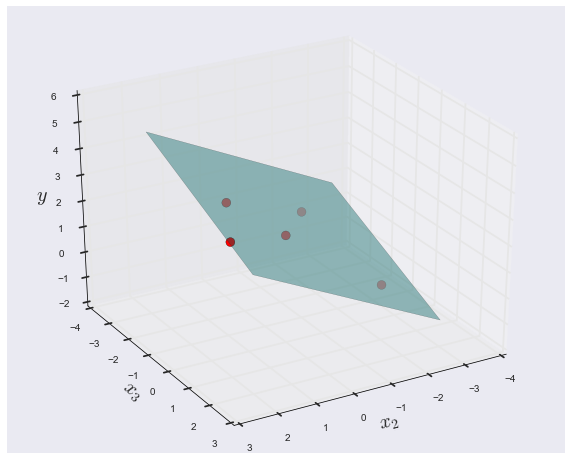

In [13]:
fig = plt.figure(figsize = (10,8))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(ex1.x2, ex1.x3, ex1.y, s = 80,  c = 'r')

# Generate coordinates for hyperplane
radius = 3
x2, x3 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm1.params[0] + lm1.params[1] * x2 + lm1.params[2] * x3

ax.plot_surface(x2, x3, fit_y, color='c', alpha = 0.4)
ax.set_xlabel('$x_2$', fontsize = 20)
ax.set_ylabel('$x_3$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)   # Controls the viewing angle

## EX 2, Income vs Insurance coverage (35+10pt -- 10+10+5+10+10)
### Dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/IncomeInsReg.csv'
You are given the demographic data of insurance coverage in NYC, with the details:
* Zip code
* Total population (for each zip code)
* Population with No Insurance coverage
* Population with Insurance coverage
    * Population with Public Insurance coverage
    * Population with Private Insurance coverage

### Tasks:
* (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information

In [14]:
ex2 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/IncomeInsReg.csv') 
ex2.head(5)

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private
0,10001,77512.0,22767,1958,20809,5800,16795
1,10002,26905.0,79490,9129,70361,40139,35167
2,10003,79088.0,56909,3774,53135,8593,48522
3,10004,98020.0,3024,244,2780,180,2705
4,10005,99633.0,7566,570,6996,122,6944


In [17]:
# check if there are areas where the sum of people in Public and Private insurance is more than the amount of people in WithCoverage
prod(ex2.loc[:,'Public':'Private'].sum(axis = 1) == ex2.WithCoverage)

0

In [18]:
ex2['WithBoth'] = ex2.Public + ex2.Private - ex2.WithCoverage 
ex2.head(10)

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private,WithBoth
0,10001,77512.0,22767,1958,20809,5800,16795,1786
1,10002,26905.0,79490,9129,70361,40139,35167,4945
2,10003,79088.0,56909,3774,53135,8593,48522,3980
3,10004,98020.0,3024,244,2780,180,2705,105
4,10005,99633.0,7566,570,6996,122,6944,70
5,10006,97226.0,2950,178,2772,29,2743,0
6,10007,173257.0,6006,183,5823,300,5654,131
7,10009,44714.0,61562,6820,54742,19353,39581,4192
8,10010,81938.0,30615,1668,28947,5938,25496,2487
9,10011,111064.0,52592,3284,49308,10115,44066,4873


* (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with NO Insurance coverage
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with BOTH types of Insurance coverage

In [29]:
incov = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/IncomeInsReg.csv') 
incov.head(5)

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private
0,10001,77512.0,22767,1958,20809,5800,16795
1,10002,26905.0,79490,9129,70361,40139,35167
2,10003,79088.0,56909,3774,53135,8593,48522
3,10004,98020.0,3024,244,2780,180,2705
4,10005,99633.0,7566,570,6996,122,6944


In [30]:
incov['WithBoth'] = incov.Public + incov.Private - incov.WithCoverage
incov['PublicOnly'] = incov.Public - incov.WithBoth
incov['PrivateOnly'] = incov.Private - incov.WithBoth
incov = incov.drop(['WithCoverage','Public', 'Private'],axis = 1)
incov.head(5)

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithBoth,PublicOnly,PrivateOnly
0,10001,77512.0,22767,1958,1786,4014,15009
1,10002,26905.0,79490,9129,4945,35194,30222
2,10003,79088.0,56909,3774,3980,4613,44542
3,10004,98020.0,3024,244,105,75,2600
4,10005,99633.0,7566,570,70,52,6874


In [31]:
# just verify that the number of category "TotalPop" is indeed the sum of all other population categories
prod(incov.iloc[:,3:].sum(axis = 1) == incov.TotalPop)

1

* (c) Similar to the lab example, drop the parts with NaN(if any), convert all population number into proportion (percentage, with the form 58.3 instead of 0.583)

In [32]:
incov.dropna(inplace = True)  #drop NAN to avoid invalid computation
incov = pd.concat([incov.IncomePerCapita, 100*incov.iloc[:,3:].div(incov.TotalPop, axis = 0)],axis = 1)
incov.head(5)

,IncomePerCapita,NoCoverage,WithBoth,PublicOnly,PrivateOnly
0,77512.0,8.600167,7.844687,17.630781,65.924364
1,26905.0,11.484463,6.220908,44.274752,38.019877
2,79088.0,6.631640,6.993621,8.105923,78.268815
3,98020.0,8.068783,3.472222,2.480159,85.978836
4,99633.0,7.533703,0.925192,0.687285,90.853820


* (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") -- What interesting results do we have here? Briefly state what you've obtained.

In [33]:
lm2 = smf.ols(formula = 'IncomePerCapita ~ WithBoth + PublicOnly + PrivateOnly', data = incov).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     97.17
Date:                Mon, 03 Oct 2016   Prob (F-statistic):           3.25e-37
Time:                        10:23:17   Log-Likelihood:                -2033.2
No. Observations:                 181   AIC:                             4074.
Df Residuals:                     177   BIC:                             4087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -6.303e+04   2.76e+04     -2.280      

### We can see from the R-sqaure that the regression model is not great.

#### Extra credit:
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

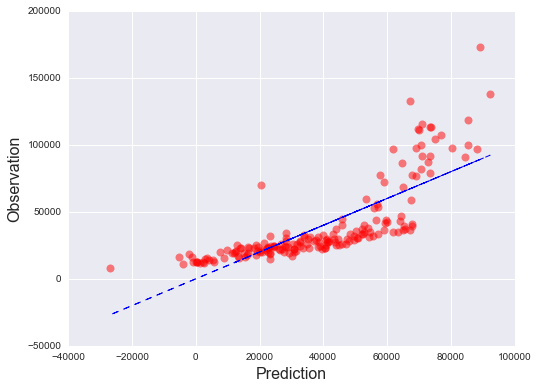

In [34]:
# Visualize the data by plotting the observation versus our prediction in a 2D plot
# Calculate the predicted value
y_fit = lm2.predict(incov)   
plt.figure(figsize = (8,6))
# Plot the observed value
plt.plot(y_fit,incov.IncomePerCapita,'or', markersize = 8, alpha = 0.5)
# Plot the predicted value
plt.plot(y_fit,y_fit,'--b', linewidth = 1)                 

# Plot setting
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)

### The fitted line looks not so great. It could be suffering from multicollinearity.

In [35]:
incov.corr()

,IncomePerCapita,NoCoverage,WithBoth,PublicOnly,PrivateOnly
IncomePerCapita,1.000000,-0.602753,0.101578,-0.746417,0.778040
NoCoverage,-0.602753,1.000000,-0.344447,0.556389,-0.679430
WithBoth,0.101578,-0.344447,1.000000,-0.201309,-0.024644
PublicOnly,-0.746417,0.556389,-0.201309,1.000000,-0.940209
PrivateOnly,0.778040,-0.679430,-0.024644,-0.940209,1.000000


### We can see from the correlation that variables are correlated to each other to a certain degree. Especially, PrivateOnly and PublicOnly are highly correlated to each other.

## EX 3, Polynomial fit (40+30pt -- 4+5+3$\times$4+5+3$\times$3+5+30)

### Try to fit y with a polynomial $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$ with the given dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H33.csv'

### Tasks:
* (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)

In [36]:
ex3 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H33.csv')
ex3

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22
5,1.773240,0.40


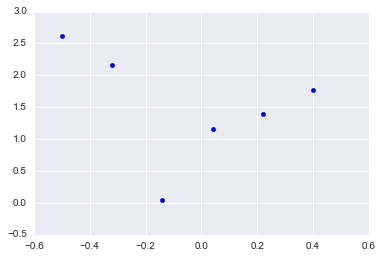

In [37]:
plt.scatter(ex3.x1, ex3.y)
plt.show()

### I guess a quadric polynomial regression model would be the best choice.

* (b) Create new columns in data frame to contain the information of $x^2, x^3, x^4$

In [38]:
ex3 = pd.DataFrame([ex3.y]  
            + [np.array(ex3.x1**(i+1)) for i in range(4)]).T # Generate all x^j, then stack them
ex3.columns = ['y']+['x%d'%(i+1) for i in range(4)]   # Rename the columns for better understanding
ex3

,y,x1,x2,x3,x4
0,2.613388,-0.50,0.2500,-0.125000,0.062500
1,2.170351,-0.32,0.1024,-0.032768,0.010486
2,0.049546,-0.14,0.0196,-0.002744,0.000384
3,1.158258,0.04,0.0016,0.000064,0.000003
4,1.397567,0.22,0.0484,0.010648,0.002343
5,1.773240,0.40,0.1600,0.064000,0.025600


* (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    * For each model, store your fitted parameters as well as your $R^2$

In [39]:
def MultiReg(data, degree):
    # First create a string for controlling the number of x_i
    string = ''
    for i in range(degree):
        string += str(i+1)  # For example, if degree == 3, then this string would be '123' at the end
    formula = 'y ~ x' + ' + x'.join(string) # join function will convert '123' to '1 + x2 + x3'

    # Perform regression and return the results
    lm = smf.ols(formula = formula, data = data).fit()
    return lm.rsquared, lm.params


# Run the function and store the results separately
R2 = []; Params = []
for M in range(1,5):
    a,b = MultiReg(ex3,M)  # For each M, run the function
    R2.append(a)
    Params.append(b)
R2

[0.10479617162381571,
 0.65125881311682743,
 0.66574886312199211,
 0.80198630229302026]

In [40]:
Params

[Intercept    1.484119
 x1          -0.858791
 dtype: float64, Intercept    0.797871
 x1          -0.112869
 x2           7.459218
 dtype: float64, Intercept    0.839133
 x1           0.686771
 x2           6.690924
 x3          -5.121962
 dtype: float64, Intercept     0.469719
 x1            2.350384
 x2           22.552763
 x3          -20.607719
 x4          -77.428785
 dtype: float64]

* (d) Report the $R^2$, plot it and observe how it changes

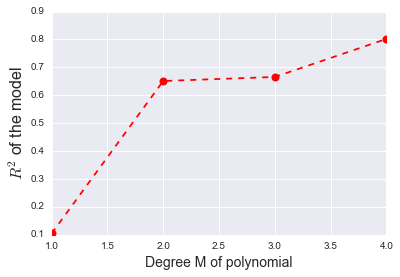

In [41]:
plt.plot(range(1,5),R2,'ro--', markersize = 8)
plt.xlabel('Degree M of polynomial', fontsize = 14)
plt.ylabel('$R^2$ of the model', fontsize = 16)
plt.show()

* (e) Create a figure with four(4) subfigures, then in each subfigure:
    * (e.1) Draw the scatter plot
    * (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
    * (e.3) Plot your fitted curve, observe how our model fits the data as M increases

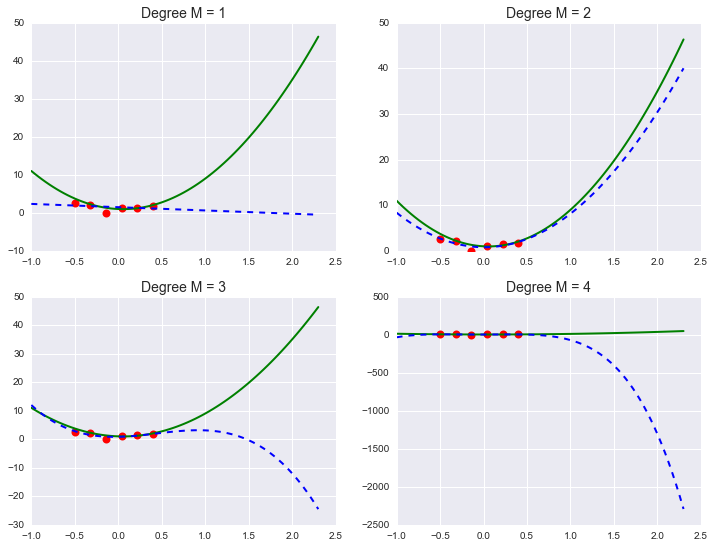

In [52]:
plt.figure(figsize = (12,9))

f = lambda x: 9 * x**2 - x + 1

for M in range(1,5):
    plt.subplot(220+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-1,2.3,80)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    
    plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)              # Green curve, the actual function f defined before
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.title('Degree M = %d'%(M), fontsize = 14)

* (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients $\hat w$

#### The second model fits the true curve best. 

In [46]:
Params[1]

Intercept    0.797871
x1          -0.112869
x2           7.459218
dtype: float64

### Extra credit
* (g) In each subfigure:
* (g.1) Pick a x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
* (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error" (You can read the lecture slides and find some inspiration at the end.)

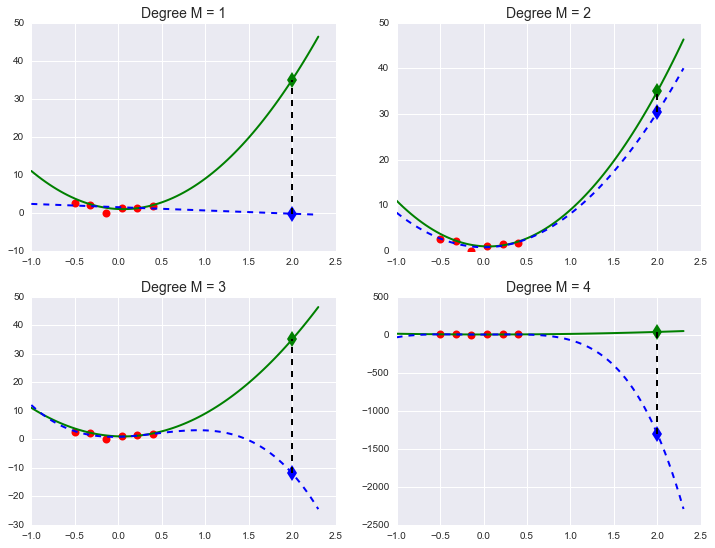

In [57]:
plt.figure(figsize = (12,9))

f = lambda x: 9 * x**2 - x + 1

for M in range(1,5):
    plt.subplot(220+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-1,2.3,80)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    
    y_future = 0
    x_future = 2.0
    for i in range(len(Params[M-1])):
        y_future += Params[M-1][i] * (x_future**i)
    plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)              # Green curve, the actual function f defined before
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.plot(x_future, y_future, 'bd', markersize = 12)        # Blue thin diamond, fitted value
    plt.plot(x_future, f(x_future), 'gd', markersize = 12)     # Green thin diamond, true value
    plt.plot([x_future,x_future], [y_future, f(x_future)], 'k--', lw = 2)
    plt.title('Degree M = %d'%(M), fontsize = 14)

 * (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten different future points and predict their values, compare your prediction with the true value), then:
      * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
      * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

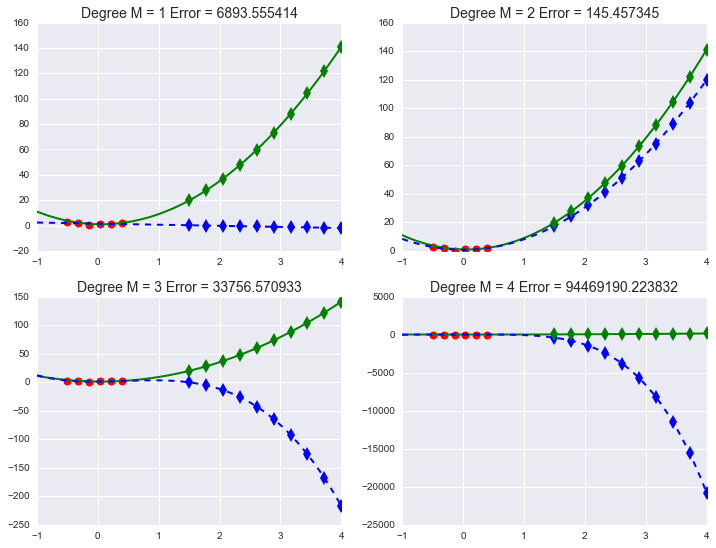

In [74]:
plt.figure(figsize = (12,9))

f = lambda x: 9 * x**2 - x + 1

for M in range(1,5):
    plt.subplot(220+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-1,4,90)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    
    y_future = []
    x_future = np.linspace(1.5,4.0,10)
    for j in range(10): 
        tmp = 0
        for i in range(len(Params[M-1])):
            tmp += Params[M-1][i] * (x_future[j]**i)
        y_future.append(tmp)    
    y_future = np.asarray(y_future)
    
    error = sum((y_future - f(x_future))**2) / 10
    plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)              # Green curve, the actual function f defined before
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.plot(x_future, y_future, 'bd', markersize = 10)        # Blue thin diamond, fitted value
    plt.plot(x_future, f(x_future), 'gd', markersize = 10)     # Green thin diamond, true value
    plt.title('Degree M = %d Error = %f'%(M,error), fontsize = 14)

#### The second model has the smallest average Error. This fitted polynomial coincides with the M you picked in part f. 